In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import pandas as pd
from joblib import dump, load

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/model_data_3sec.csv'))
orignial_df

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
#drop label and filename columns
X = orignial_df.drop(['Unnamed: 0','label','filename'], axis=1)
# get label values 
y = orignial_df['label']
y.unique()

array(['Rock', 'Folk', 'Experimental', 'Hip-Hop', 'International', 'Pop',
       'Electronic', 'Instrumental'], dtype=object)

In [4]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0.381544,0.249562,1957.407156,2048.485350,3585.029860,0.100943,0.000052,0.000068,112.347147,-8.945985,...,3.019332,3.665317,-9.748421,2.995540,-4.559982,-2.866331,-8.990259,1.595329,-6.731744,4.317326
1,0.484288,0.253424,2766.351306,2542.654962,5738.018893,0.158905,0.000034,-0.000009,117.453835,31.914341,...,-3.049455,2.144493,-9.148898,4.389838,-6.054724,-3.617906,-7.587147,0.172193,-5.444875,1.197923
2,0.425569,0.256628,2908.207536,2703.913526,6252.910907,0.163713,0.000011,-0.000250,117.453835,36.925098,...,-5.784952,3.680824,-10.186584,2.543274,-6.967072,-2.589857,-8.594354,-0.271126,-5.592191,-0.288590
3,0.468948,0.265448,2618.340173,2548.584807,5554.903846,0.139870,-0.000049,-0.000192,123.046875,37.924717,...,-8.235471,1.791170,-8.883386,-0.221089,-7.038162,-2.001146,-9.315182,-3.543423,-5.760088,2.120627
4,0.392290,0.271375,2767.550410,2663.721676,5940.845102,0.146143,-0.000054,-0.000268,117.453835,37.417984,...,2.061754,-0.329844,-7.563095,4.706252,-5.521904,-4.830932,-8.423706,-0.152457,-4.535352,2.383680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,0.457243,0.243057,483.225740,875.708502,703.804462,0.019449,0.000010,-0.000006,135.999178,-278.415741,...,-1.636234,6.133297,4.796370,2.530937,7.792923,14.952423,4.513030,4.309551,9.335838,4.856527
71942,0.447897,0.234766,660.113748,1349.132689,775.692233,0.019035,-0.000303,0.000336,135.999178,-273.169312,...,-3.726220,7.489089,2.066535,1.700049,2.323061,7.850317,1.916095,2.931519,7.093570,5.723800
71943,0.444989,0.230987,631.195340,1317.927939,887.664889,0.014461,0.000217,-0.000002,135.999178,-277.834869,...,-3.057849,6.231783,3.418291,4.423429,6.805921,10.383173,4.368050,4.368290,7.466063,1.732873
71944,0.485998,0.233158,616.469137,1299.877639,730.638146,0.018412,-0.000048,0.000080,135.999178,-284.960388,...,-3.458435,7.796859,3.189467,2.171970,2.082361,6.422930,1.273448,4.322249,9.085366,6.584610


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### with unscaled data

k: 1, Train/Test Score: 1.000/0.387
k: 3, Train/Test Score: 0.639/0.365
k: 5, Train/Test Score: 0.573/0.374
k: 7, Train/Test Score: 0.531/0.372
k: 9, Train/Test Score: 0.506/0.372


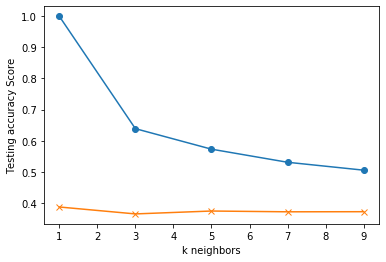

In [6]:
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

### with scaled data

In [7]:

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.845
k: 3, Train/Test Score: 0.915/0.797
k: 5, Train/Test Score: 0.874/0.773
k: 7, Train/Test Score: 0.842/0.748
k: 9, Train/Test Score: 0.815/0.726


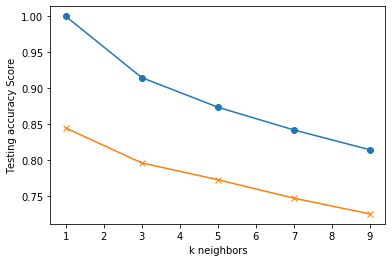

In [8]:
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.797


In [10]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
44056,Instrumental,Instrumental
57204,Folk,Instrumental
35597,Experimental,Instrumental
67683,Folk,Hip-Hop
14742,Pop,International
...,...,...
28832,Hip-Hop,Hip-Hop
44393,Pop,Pop
65750,Folk,Folk
60828,Rock,Rock


In [11]:
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

   Electronic       0.70      0.83      0.76      2278
 Experimental       0.76      0.82      0.79      2184
         Folk       0.77      0.85      0.81      2236
      Hip-Hop       0.83      0.82      0.82      2333
 Instrumental       0.82      0.76      0.79      2277
International       0.82      0.79      0.80      2209
          Pop       0.84      0.69      0.76      2218
         Rock       0.88      0.82      0.85      2252

     accuracy                           0.80     17987
    macro avg       0.80      0.80      0.80     17987
 weighted avg       0.80      0.80      0.80     17987



In [12]:

dump(knn, 'Model/3_sec_model_KNN.joblib') 

['Model/3_sec_model_KNN.joblib']

def predict(data_path):
    #preprocessing data
    true_df = pd.read_csv(Path(data_path))
    X_true = true_df.drop(['label','filename'], axis=1)
    y_true = true_df['label']
    X_true = X_true[X_true.columns.drop(list(X_true.filter(regex='var')))]
    X_scaler = StandardScaler().fit(X_true)
    X_true_scaled = X_scaler.transform(X_true)
    knn = load('Model/3_sec_model_KNN.joblib')
    knn.fit(X_true_scaled, y_true)
    print('k=3 Test Acc: %.3f' % knn.score(X_true_scaled, y_true))
    predictions = knn.predict(X_true_scaled)
    pd.DataFrame({"Prediction": predictions, "Actual": y_true})
    
    return predicions 

data_path = "Resources/true_data_3sec.csv"
predictions(data_path)

In [23]:
url = 'Resources/true_data_3sec.csv'
test_data = pd.read_csv(url)
input_data = test_data.drop(['Unnamed: 0'], axis=1)
input_data = input_data.sample(5)  
input_data

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
237,9-046160.mp3,0.278947,0.100639,0.132333,0.001074,2771.804214,6.512588e+05,2785.734085,1.151034e+05,6076.090182,...,32.284481,-7.301805,41.695187,0.322852,54.273056,0.405214,41.962173,10.978882,43.346172,Electronic
3329,8-037147.mp3,0.460615,0.083920,0.218401,0.003552,2995.970745,1.730797e+05,2825.368192,1.155038e+04,6281.732272,...,14.377479,-3.311736,10.584595,-1.487092,12.159566,-10.065544,16.952318,3.889079,18.242214,Rock
7577,8-114222.mp3,0.369020,0.073760,0.074361,0.000090,1998.845847,1.222431e+04,1184.848065,2.860147e+03,3362.492488,...,16.572826,-11.232115,23.825317,-0.774487,15.696893,-7.429318,20.547508,-6.873811,14.907942,Instrumental
2348,4-107129.mp3,0.628365,0.071378,0.063766,0.004149,1000.460218,1.584430e+06,1505.509189,1.193773e+06,1970.370906,...,26.959011,6.375711,15.122200,4.539499,16.074791,3.621032,21.492479,5.487942,10.415550,Electronic
5033,4-112468.mp3,0.398464,0.082569,0.154179,0.002802,1969.647705,2.648798e+05,2311.943916,1.261034e+05,4032.920485,...,35.593761,-3.279714,30.572815,1.619947,41.185829,-2.276404,35.229832,3.165903,51.975719,Hip-Hop


In [24]:
# preprocessing  test data
    X = input_data.drop(['label','filename'], axis=1)
    y = input_data['label']
    X = X[X.columns.drop(list(X.filter(regex='var')))]
    X_scaler = StandardScaler().fit(X)
    X_scaled = X_scaler.transform(X)    
    knn = load('Model/3_sec_model_KNN.joblib')
    print('k=3 Test Acc: %.3f' % knn.score(X_scaled, y))

    #making predictions
    predictions = knn.predict(X_scaled)
    model_output = pd.DataFrame({"Prediction": predictions, "Actual": y})
    model_output

k=3 Test Acc: 0.600


,Prediction,Actual
237,Electronic,Electronic
3329,Hip-Hop,Rock
7577,Instrumental,Instrumental
2348,Hip-Hop,Electronic
5033,Hip-Hop,Hip-Hop
